In [16]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
from time import time
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import random

# import sklearn utils
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.feature_extraction.image import extract_patches_2d

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.feature_extraction.image import extract_patches_2d

In [2]:
# ==============================================
# FILES MANAGEMENT
# ==============================================

DOWNLOAD_ROOT = "http://www.macs.hw.ac.uk/%7Eek19/data/"
CURRENT_PATH = os.path.join(os.getcwd(), "datasets")
X_FILE = "x_train_gr_smpl.csv"
Y_FILE ="y_train_smpl.csv"

def fetch_file(file, download_root=DOWNLOAD_ROOT, current_path=CURRENT_PATH):
    if os.path.isfile(os.path.join(current_path, file)):
        return
    
    os.makedirs(current_path, exist_ok=True)
    urllib.request.urlretrieve(download_root + file, os.path.join(current_path, file))

In [3]:
# fetching all files needed in the task
fetch_file(X_FILE)
fetch_file(Y_FILE)

for i in range(10):
    fetch_file("y_train_smpl_" + str(i) + ".csv")

In [4]:
# Loading functions 
def load_features_data(current_path=CURRENT_PATH):
    return pd.read_csv(os.path.join(current_path, X_FILE)).rename(columns=lambda s: "pixel_"+s, index=lambda s: "sign_"+str(s))

def load_labels_data(labels_n=None):
    if labels_n is None:
        return pd.read_csv(os.path.join(CURRENT_PATH, Y_FILE)).rename(columns=lambda s:"class", index=lambda s: "sign_"+str(s))
    else:
        return pd.read_csv(os.path.join(CURRENT_PATH, "y_train_smpl_" + str(labels_n) + ".csv")).rename(columns=lambda s:"class_"+str(labels_n), index=lambda s: "sign_"+str(s))

In [5]:
# getting file with all labels
all_labels = load_labels_data()

# getting file with all features
features = load_features_data()

In [6]:
X_original = features.to_numpy()
y_original = all_labels.to_numpy().reshape(-1)

In [7]:
y_original.shape,X_original.shape


((9690,), (9690, 2304))

In [8]:
X = X_original.copy()
y = y_original.copy()

In [9]:
# Selecting only the middle 24 x 24 part of the image 12:36
X = X.reshape(-1, 48, 48)[:, 12:36, 12:36].reshape(-1, 24 * 24)

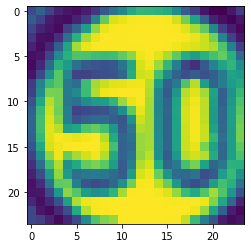

In [10]:
plt.imshow(random.choice(X).reshape(24, 24))

In [11]:
data = scale(X)
labels = y
sample_size=300
n_clusters = [5, 10, 15, 20, 30, 40, 50, 75, 100]

estimators = []
silhouette_scores = []

for i in n_clusters:
  estimator = KMeans(init='k-means++', n_clusters=i)
  estimator.fit(data)
  estimators.append(estimator)
  silhouette_scores.append(metrics.silhouette_score(data, estimator.labels_,
                                        metric='euclidean',
                                        sample_size=sample_size))

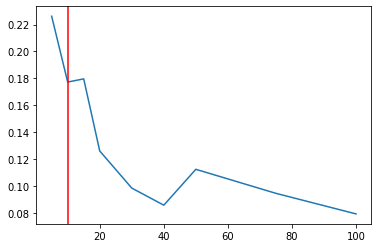

In [12]:
plt.plot(n_clusters, silhouette_scores)
plt.axvline(x=10, color='red')

In [13]:
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

def KMeans_Analysis(X, y):
  data = scale(X)

  n_samples, n_features = data.shape
  n_digits = len(np.unique(y))
  labels = y

  sample_size = 300
  estimators = {}

  print(82 * '_')
  print('init\t\ttime\thomo\tcompl\tv-meas\tsilhouette')

  def bench_k_means(estimator, name, data):
      t0 = time()
      estimator.fit(data)
      print('%-9s\t%.2fs\t%.3f\t%.3f\t%.3f\t%.3f'
            % (name, (time() - t0), 
              metrics.homogeneity_score(labels, estimator.labels_),
              metrics.completeness_score(labels, estimator.labels_),
              metrics.v_measure_score(labels, estimator.labels_),
              metrics.silhouette_score(data, estimator.labels_,
                                        metric='euclidean',
                                        sample_size=sample_size)))
      return estimator

  estimators['k-means++'] = bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
                name="k-means++", data=data)

  estimators['random'] = bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
                name="random", data=data)
  print(82 * '_')

  return estimators

In [14]:
X = X_original.copy()
y = y_original.copy()

In [17]:
estimator_1 = KMeans_Analysis(X, y)

__________________________________________________________________________________
init		time	homo	compl	v-meas	silhouette
k-means++	15.48s	0.124	0.115	0.119	0.147
random   	13.53s	0.125	0.116	0.120	0.139
__________________________________________________________________________________


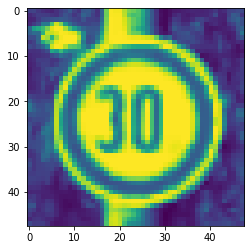

In [18]:
plt.imshow(random.choice(X).reshape(48, 48))

In [33]:
X = X_original.copy()
y = y_original.copy()

In [34]:
# Selecting only the middle 24 x 24 part of the image 12:36
X = X.reshape(-1, 48, 48)[:, 12:36, 12:36].reshape(-1, 24 * 24)

In [21]:
estimator_2 = KMeans_Analysis(X, y)

__________________________________________________________________________________
init		time	homo	compl	v-meas	silhouette
k-means++	5.09s	0.183	0.164	0.173	0.181
random   	4.90s	0.183	0.164	0.173	0.179
__________________________________________________________________________________


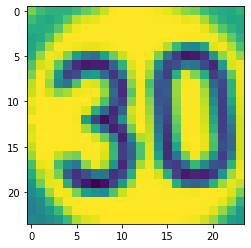

In [35]:
plt.imshow(random.choice(X).reshape(24, 24))

In [23]:
X = X_original.copy()
y = y_original.copy()

In [24]:
# Selecting only the middle 16 x 16 part of the image
X = X.reshape(-1, 48, 48)[:, 16:32, 16:32].reshape(-1, 16 * 16)

In [25]:
estimator_3 = KMeans_Analysis(X, y)

__________________________________________________________________________________
init		time	homo	compl	v-meas	silhouette
k-means++	2.46s	0.189	0.168	0.178	0.210
random   	2.91s	0.190	0.168	0.178	0.187
__________________________________________________________________________________


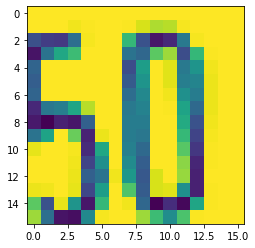

In [26]:
plt.imshow(random.choice(X).reshape(16, 16))

In [27]:
X = X_original.copy()
y = y_original.copy()

In [28]:
# Selecting only the middle 12 x 12 part of the image
X = X.reshape(-1, 48, 48)[:, 18:30, 18:30].reshape(-1, 12 * 12)

In [29]:
estimator_4 = KMeans_Analysis(X, y)

__________________________________________________________________________________
init		time	homo	compl	v-meas	silhouette
k-means++	1.76s	0.156	0.140	0.148	0.169
random   	1.90s	0.158	0.141	0.149	0.160
__________________________________________________________________________________


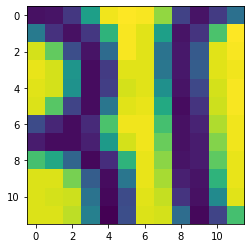

In [30]:
plt.imshow(random.choice(X).reshape(12, 12))